In [10]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

The first picture in the test set is:


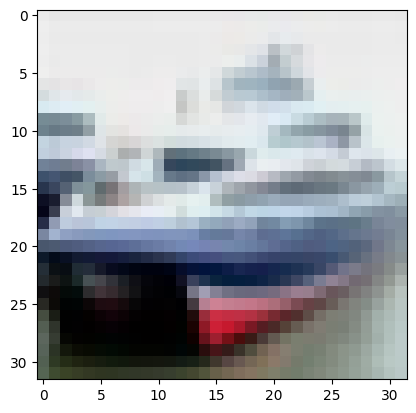

The picture seems to be of a ship
The picture is blur as the original picture is only 32 pixels width and height


In [9]:
pic = x_test[1]
print("The first picture in the test set is:")
plt.imshow(pic)
plt.show()
print("The picture seems to be of a ship")
print("The picture is blur as the original picture is only 32 pixels width and height")

In [12]:
model = keras.Sequential(
    [layers.Dense(512, activation="relu"), layers.Dense(10, activation="softmax")]
)

model.compile(
    optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

train_images = x_train.reshape((50000, 32, 32, 3))
train_images = x_train.astype("float32") / 255
test_images = x_test.reshape((10000, 32, 32, 3))
test_images = x_test.astype("float32") / 255

inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [14]:
model.compile(
    optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

model.fit(train_images, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 43s 26ms/step - loss: 1.5216 - accuracy: 0.4500
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1226 - accuracy: 0.6056
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9500 - accuracy: 0.6692
Epoch 4/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8442 - accuracy: 0.7093
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7619 - accuracy: 0.7378
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6937 - accuracy: 0.7619
Epoch 7/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6356 - accuracy: 0.7829
Epoch 8/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.5816 - accuracy: 0.8010
Epoch 9/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.5370 - accuracy: 0.8138
Epoch 10/10
1563/1563 [==============================] - 40s 26m

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856 

In [16]:
test_loss, test_acc = model.evaluate(test_images, y_test)
print(f"The Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 4s 10ms/step - loss: 0.9139 - accuracy: 0.7117
The Test accuracy: 0.712


In [17]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[1]

1/1 [==============================] - 0s 234ms/step


array([4.2476531e-02, 1.9678276e-03, 1.7874784e-06, 5.8212294e-07,
       7.8716276e-08, 1.1490250e-09, 5.7406911e-08, 3.7665611e-08,
       9.5163149e-01, 3.9216075e-03], dtype=float32)